In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import files
uploaded = files.upload()

Saving EastWestAirlines.xlsx to EastWestAirlines.xlsx


In [5]:
Data=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
Data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [8]:
print(Data.isnull().sum())

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


In [11]:
import numpy as np
from scipy import stats

z_scores = np.abs(stats.zscore(Data.select_dtypes(include=[np.number])))
outliers = np.where(z_scores > 3)  # Z-score threshold > 3 is considered an outlier
Data_no_outliers = Data[(z_scores < 3).all(axis=1)]

# Alternatively, using IQR (Interquartile Range) to remove outliers
Q1 = Data.quantile(0.25)
Q3 = Data.quantile(0.75)
IQR = Q3 - Q1

# Remove rows that are outliers
Data_no_outliers = Data[~((Data < (Q1 - 1.5 * IQR)) | (Data > (Q3 + 1.5 * IQR))).any(axis=1)]


In [14]:
print(Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB
None


In [15]:
print(Data.describe())

               ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      

In [16]:
print(Data.head())

   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  


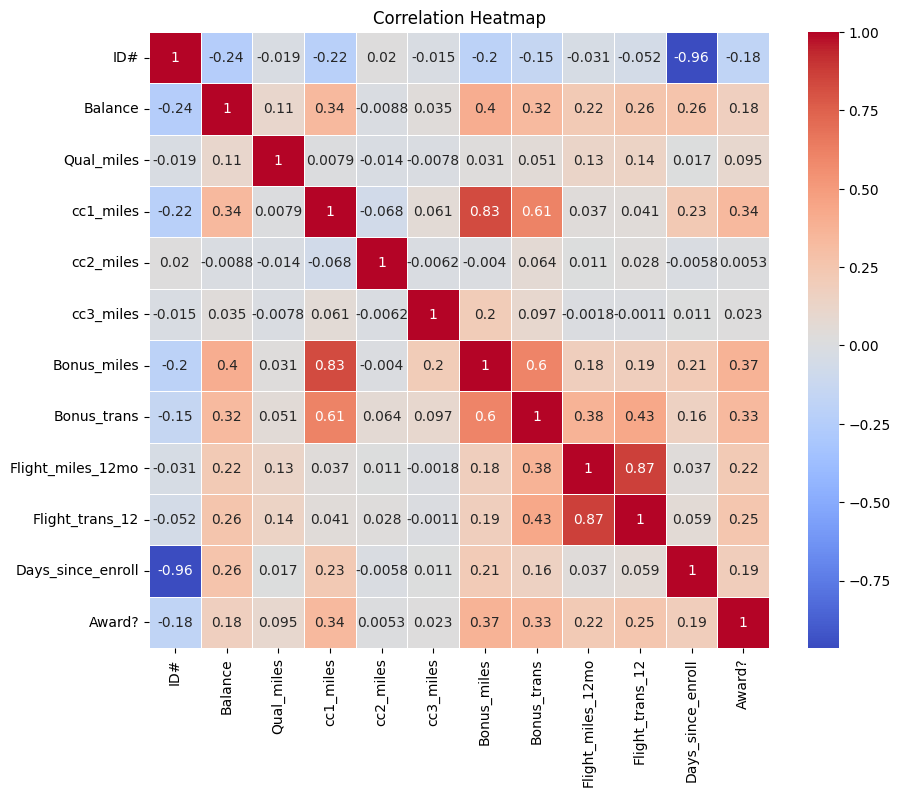

In [22]:
correlation_matrix = Data.corr()

# Heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Implementing Clustering Algorithms**

Silhouette Score for DBSCAN with eps=0.1, minPts=5: -0.31926655820934524


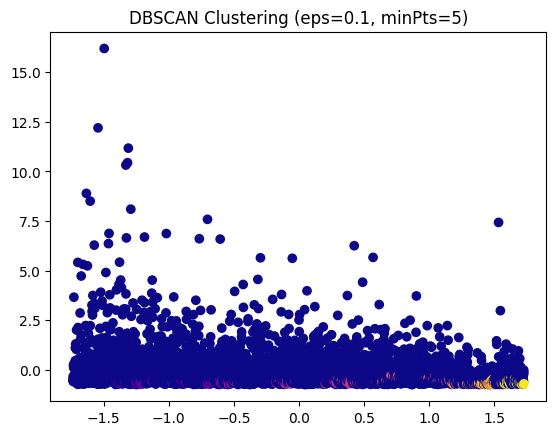

Silhouette Score for DBSCAN with eps=0.1, minPts=10: -0.28825906393776257


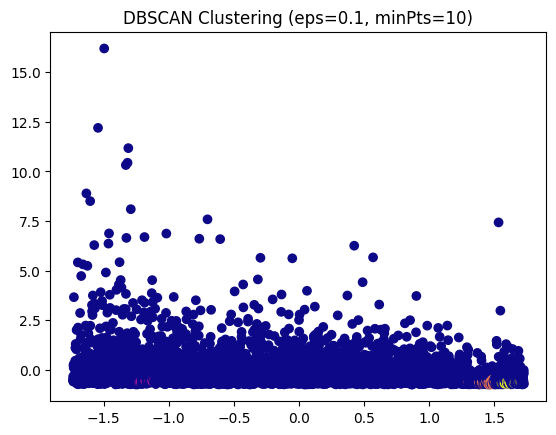

Silhouette Score for DBSCAN with eps=0.1, minPts=15: -0.1149716890420679


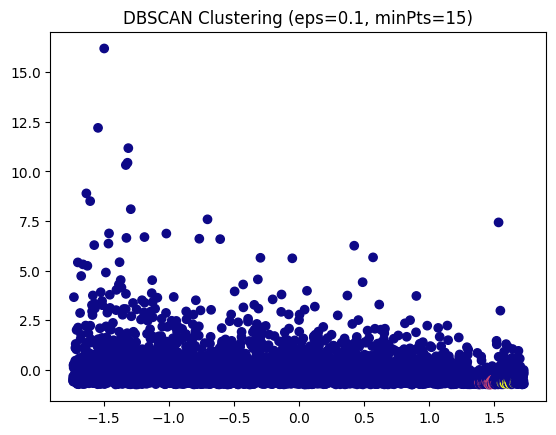

Silhouette Score for DBSCAN with eps=0.2, minPts=5: -0.41096312362369963


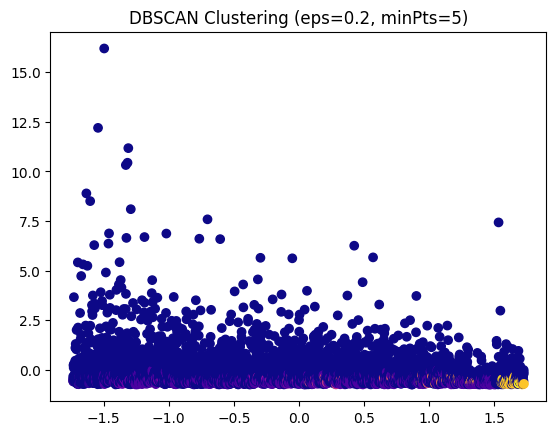

Silhouette Score for DBSCAN with eps=0.2, minPts=10: -0.3166364187879481


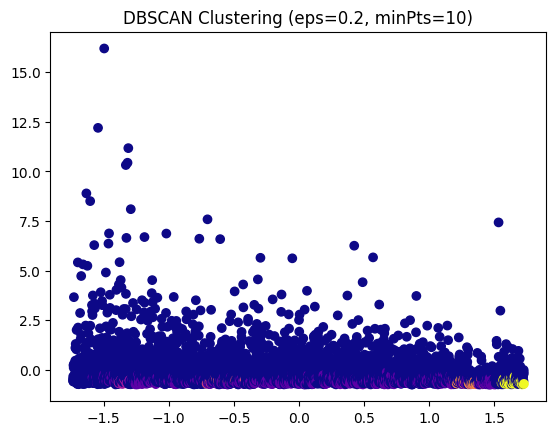

Silhouette Score for DBSCAN with eps=0.2, minPts=15: -0.28325213740424654


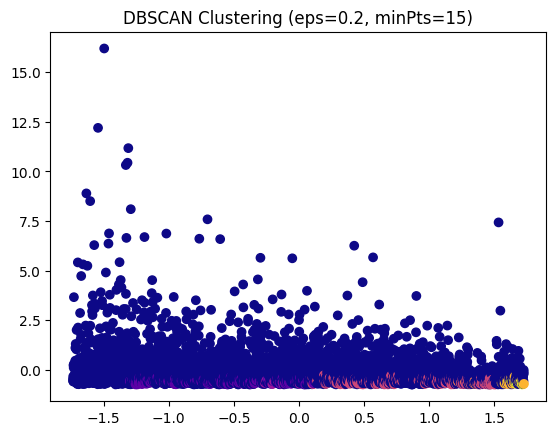

Silhouette Score for DBSCAN with eps=0.3, minPts=5: -0.44169976890830664


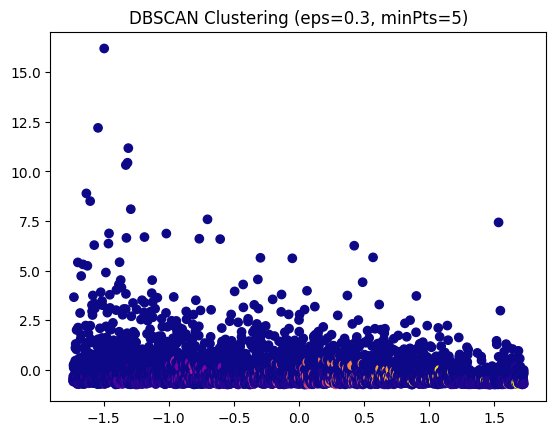

Silhouette Score for DBSCAN with eps=0.3, minPts=10: -0.2572508259503251


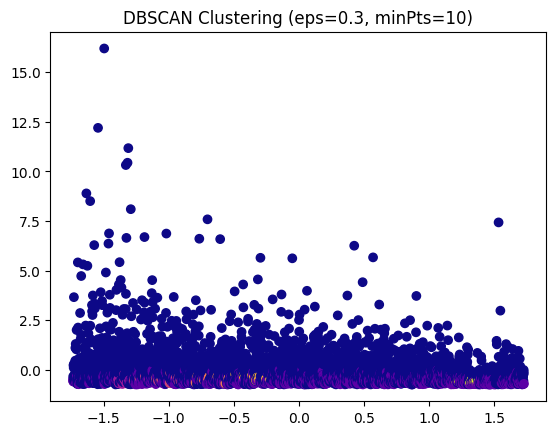

Silhouette Score for DBSCAN with eps=0.3, minPts=15: -0.17195999191751266


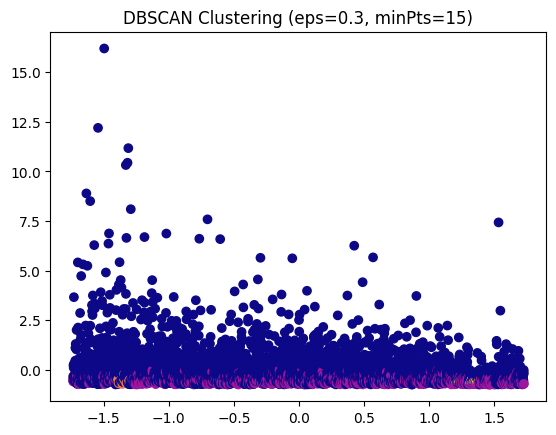

Silhouette Score for DBSCAN with eps=0.4, minPts=5: -0.4203292592355581


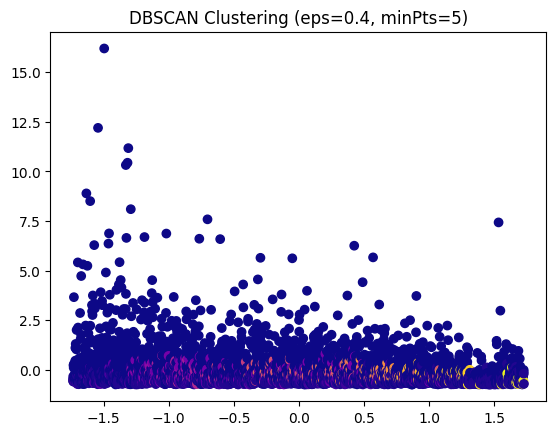

Silhouette Score for DBSCAN with eps=0.4, minPts=10: -0.380260219146385


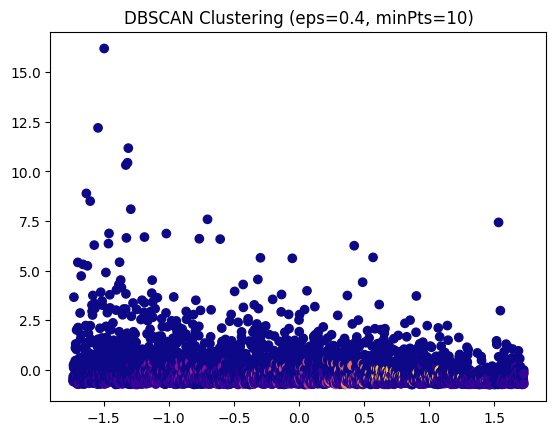

Silhouette Score for DBSCAN with eps=0.4, minPts=15: -0.17666488128542304


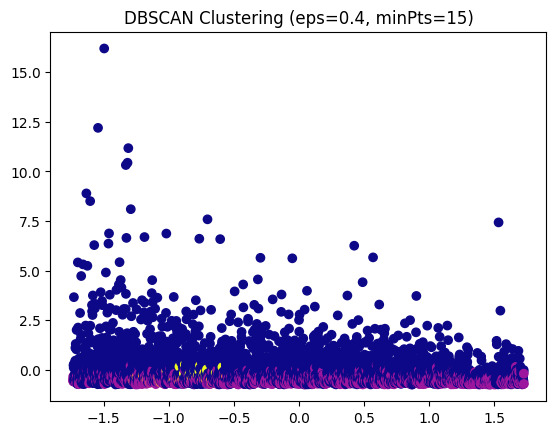

Silhouette Score for DBSCAN with eps=0.5, minPts=5: -0.2823258834687895


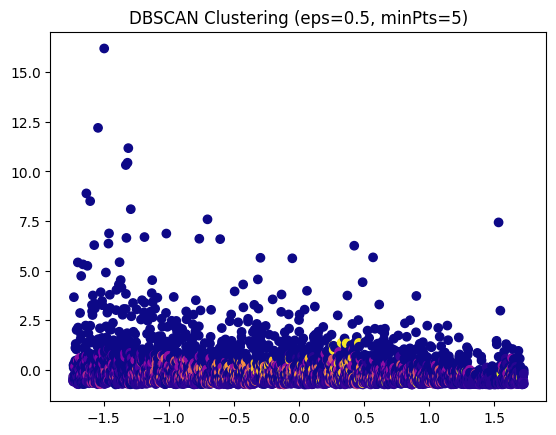

Silhouette Score for DBSCAN with eps=0.5, minPts=10: -0.2950430143171104


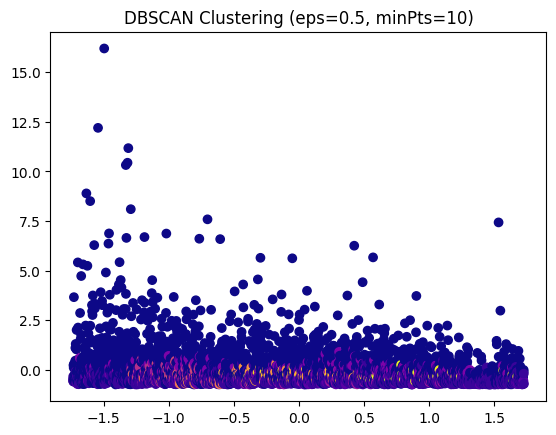

Silhouette Score for DBSCAN with eps=0.5, minPts=15: -0.23645146158190464


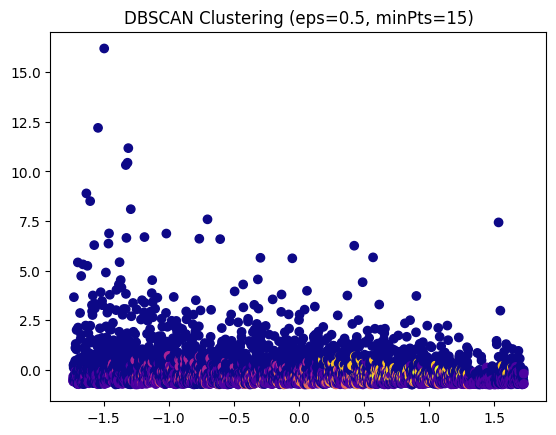

In [29]:
eps_values = [0.1, 0.2, 0.3, 0.4, 0.5]
min_pts_values = [5, 10, 15]

for eps in eps_values:
    for min_pts in min_pts_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_pts)
        y_dbscan = dbscan.fit_predict(X_scaled)

        # Evaluate clustering results (e.g., silhouette score, Davies-Bouldin Index)
        if len(set(y_dbscan)) > 1:  # Avoid error if all data points are noise
            silhouette_avg = metrics.silhouette_score(X_scaled, y_dbscan)
            print(f"Silhouette Score for DBSCAN with eps={eps}, minPts={min_pts}:", silhouette_avg)

        # Visualize DBSCAN clusters (optional, for 2D data)
        plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_dbscan, cmap='plasma')
        plt.title(f"DBSCAN Clustering (eps={eps}, minPts={min_pts})")
        plt.show()